#Get Dataset: [link dataset](https://huggingface.co/datasets/uit-nlp/vietnamese_students_feedback)

##Vietnamese students feedback

In [3]:
import requests
import csv
import os
import gdown
import shutil
import pandas as pd

path_train = "train.csv"
path_val = "val.csv"
path_test = "test.csv"

###Imcomplete version datadet

In [6]:
# url_train = "https://datasets-server.huggingface.co/first-rows?dataset=uit-nlp%2Fvietnamese_students_feedback&config=default&split=train"
# url_val = "https://datasets-server.huggingface.co/first-rows?dataset=uit-nlp%2Fvietnamese_students_feedback&config=default&split=validation"
# url_test = "https://datasets-server.huggingface.co/first-rows?dataset=uit-nlp%2Fvietnamese_students_feedback&config=default&split=test"

# def json2csv(url, out):
#   request = requests.get(url_train)
#   if request.status_code == 200:
#     json = request.json()
#     with open(out, 'w') as data:
#       f = csv.writer(data)
#       f.writerow(list(json['rows'][0]['row'].keys())[:-1])
#       for it in json['rows']:
#         f.writerow(list(it['row'].values())[:-1])

# json2csv(url_train, path_train)
# json2csv(url_val, path_val)
# json2csv(url_test, path_test)

###Complete version datadet

In [8]:
if not os.path.exists('tmp'):
  os.mkdir('tmp')
    
filename_down = (
  ("https://drive.google.com/uc?id=1nzak5OkrheRV1ltOGCXkT671bmjODLhP&export=download", "tmp/train_sentence.txt"),
  ("https://drive.google.com/uc?id=1ye-gOZIBqXdKOoi_YxvpT6FeRNmViPPv&export=download", "tmp/train_sentiment.txt"),
  ("https://drive.google.com/uc?id=1sMJSR3oRfPc3fe1gK-V3W5F24tov_517&export=download", "tmp/val_sentence.txt"),
  ("https://drive.google.com/uc?id=1GiY1AOp41dLXIIkgES4422AuDwmbUseL&export=download", "tmp/val_sentiment.txt"),
  ("https://drive.google.com/uc?id=1aNMOeZZbNwSRkjyCWAGtNCMa3YrshR-n&export=download", "tmp/test_sentence.txt"),
  ("https://drive.google.com/uc?id=1vkQS5gI0is4ACU58-AbWusnemw7KZNfO&export=download", "tmp/test_sentiment.txt")
)

for it in filename_down:
  gdown.download(it[0], it[1], quiet=False)

def concat_data(url1, url2, out):
  with open(url1, 'r') as f:
    df1 = f.read().split('\n')[:-1]
  with open(url2, 'r') as f:
    df2 = f.read().split('\n')[:-1]
  
  df = pd.DataFrame({'sentence': df1,  'sentiment': df2})
  df.to_csv(out, index=False)

concat_data('tmp/train_sentence.txt', 'tmp/train_sentiment.txt', path_train)
concat_data('tmp/val_sentence.txt', 'tmp/val_sentiment.txt', path_val)
concat_data('tmp/test_sentence.txt', 'tmp/test_sentiment.txt', path_test)

shutil.rmtree('tmp')

Downloading...
From: https://drive.google.com/uc?id=1nzak5OkrheRV1ltOGCXkT671bmjODLhP&export=download
To: /content/tmp/train_sentence.txt
100%|██████████| 898k/898k [00:00<00:00, 159MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ye-gOZIBqXdKOoi_YxvpT6FeRNmViPPv&export=download
To: /content/tmp/train_sentiment.txt
100%|██████████| 22.9k/22.9k [00:00<00:00, 37.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1sMJSR3oRfPc3fe1gK-V3W5F24tov_517&export=download
To: /content/tmp/val_sentence.txt
100%|██████████| 119k/119k [00:00<00:00, 52.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GiY1AOp41dLXIIkgES4422AuDwmbUseL&export=download
To: /content/tmp/val_sentiment.txt
100%|██████████| 3.17k/3.17k [00:00<00:00, 4.65MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aNMOeZZbNwSRkjyCWAGtNCMa3YrshR-n&export=download
To: /content/tmp/test_sentence.txt
100%|██████████| 248k/248k [00:00<00:00, 57.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vk

##Stop words



In [9]:
!wget 'https://github.com/stopwords/vietnamese-stopwords/blob/master/vietnamese-stopwords.txt'

--2022-11-29 03:50:45--  https://github.com/stopwords/vietnamese-stopwords/blob/master/vietnamese-stopwords.txt
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘vietnamese-stopwords.txt’

vietnamese-stopword     [ <=>                ] 600.16K  --.-KB/s    in 0.04s   

2022-11-29 03:50:46 (15.1 MB/s) - ‘vietnamese-stopwords.txt’ saved [614560]



In [10]:
stop_words = '/content/vietnamese-stopwords.txt'

#Code

In [11]:
import numpy as np 
import torch
import torch.nn as nn
import torch.nn.functional as F
from nltk.corpus import stopwords 
from collections import Counter
import string
import re
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
random_seed = 1234
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [37]:
device = ('cpu', 'cuda')[torch.cuda.is_available()]

df_train = pd.read_csv(path_train)
df_val = pd.read_csv(path_val)
df_train.head()

,sentence,sentiment
0,slide giáo trình đầy đủ .,2
1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",2
2,đi học đầy đủ full điểm chuyên cần .,0
3,chưa áp dụng công nghệ thông tin và các thiết ...,0
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",2


In [38]:
x_train, y_train = df_train['sentence'], df_train['sentiment']
x_val, y_val = df_val['sentence'], df_val['sentiment']
print(f'shape of train data is {x_train.shape}')
print(f'shape of val data is {x_val.shape}')

shape of train data is (11426,)
shape of val data is (1583,)


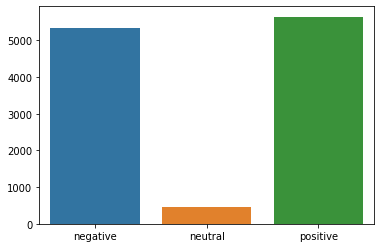

In [39]:
dd = pd.Series(y_train).value_counts().sort_index()
sns.barplot(x=np.array(['negative', 'neutral', 'positive']), y=dd.values)
plt.show()

###Preprocess

In [40]:
def preprocess_string(s):
  # Remove all non-word characters (everything except numbers and letters)
  s = re.sub(r"[^\w\s]", '', s)
  # Replace all runs of whitespaces with no space
  s = re.sub(r"\s+", '', s)
  # replace digits with no space
  s = re.sub(r"\d", '', s)

  return s

def tockenize(x_train, y_train, x_val, y_val, stop_words):
  word_list = []

  stop_words = set(stopwords.words(stop_words)) 
  for sent in x_train:
    for word in sent.lower().split():
      word = preprocess_string(word)
      if word not in stop_words and word != '':
        word_list.append(word)

  corpus = Counter(word_list)
  # sorting on the basis of most common words
  corpus_ = sorted(corpus, key=corpus.get, reverse=True)[:1000]
  # creating a dict
  onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}
  
  # tockenize
  final_list_train, final_list_test = [],[]
  for sent in x_train:
    final_list_train.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split() 
                              if preprocess_string(word) in onehot_dict.keys()])
  for sent in x_val:
    final_list_test.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split() 
                            if preprocess_string(word) in onehot_dict.keys()])
          
  return np.array(final_list_train), np.array(y_train), np.array(final_list_test), np.array(y_val), onehot_dict

In [41]:
x_train, y_train, x_val, y_val, vocab = tockenize(x_train, y_train, x_val, y_val, stop_words)
print(f'Length of vocabulary is {len(vocab)}')

Length of vocabulary is 1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


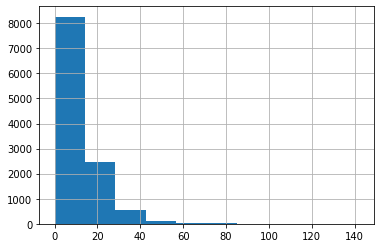

count    11426.000000
mean        12.456153
std          9.297093
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        142.000000
dtype: float64

In [42]:
rev_len = [len(i) for i in x_train]
pd.Series(rev_len).hist()
plt.show()
pd.Series(rev_len).describe()

In [43]:
def padding_(sentences, seq_len):
  features = np.zeros((len(sentences), seq_len),dtype=int)
  for ii, review in enumerate(sentences):
    if len(review) != 0:
      features[ii, -len(review):] = np.array(review)[:seq_len]
  return features

In [44]:
# we have very less number of reviews with length > 500.
# So we will consideronly those below it.
x_train_pad = padding_(x_train, 500)
x_val_pad = padding_(x_val, 500)

In [45]:
x_train_pad.shape

(11426, 500)

In [46]:
batch_size = 50

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(x_train_pad), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(x_val_pad), torch.from_numpy(y_val))

# dataloaders

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)

In [47]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample input: \n', sample_y)

Sample input size:  torch.Size([50, 500])
Sample input: 
 tensor([[  0,   0,   0,  ..., 351, 194,   9],
        [  0,   0,   0,  ..., 182,  37,  39],
        [  0,   0,   0,  ...,  10,  13,   8],
        ...,
        [  0,   0,   0,  ..., 284,   7, 427],
        [  0,   0,   0,  ...,   3,  18,  15],
        [  0,   0,   0,  ...,   8, 768, 238]])
Sample input: 
 tensor([0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0,
        2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0,
        2, 2])


###Model

In [48]:
class SentimentRNN(nn.Module):
  def __init__(self, no_layers, vocab_size, hidden_dim, embedding_dim, output_dim, drop_prob=0.5):
    super(SentimentRNN,self).__init__()

    self.output_dim = output_dim
    self.hidden_dim = hidden_dim

    self.no_layers = no_layers
    self.vocab_size = vocab_size

    # embedding and LSTM layers
    self.embedding = nn.Embedding(vocab_size, embedding_dim)
    
    #lstm
    self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                        num_layers=no_layers, batch_first=True)
    
    # dropout layer
    self.dropout = nn.Dropout(0.3)

    # linear and sigmoid layer
    self.fc = nn.Linear(self.hidden_dim, output_dim)
      
  def forward(self, x, hidden = None):
    batch_size = x.size(0)
    # embeddings and lstm_out
    embeds = self.embedding(x)  # shape: B x S x Feature   since batch = True
    
    #print(embeds.shape)  #[50, 500, 1000]
    lstm_out, hidden = self.lstm(embeds, hidden)
    lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim) 
    
    # dropout and fully connected layer
    out = self.dropout(lstm_out)
    out = self.fc(out)

    # sigmoid function
    sig_out = nn.functional.log_softmax(out, 1)
    
    # reshape to be batch_size first
    sig_out = sig_out.view(batch_size, sig_out.shape[0]//batch_size, self.output_dim)

    sig_out = sig_out[:, -1, :] # get last batch of labels

    # return last sigmoid output and hidden state
    return sig_out, hidden

###Train

In [52]:
no_layers = 2
vocab_size = len(vocab) + 1 # extra 1 for padding
embedding_dim = 64
output_dim = 3
hidden_dim = 256

model = SentimentRNN(no_layers, vocab_size, hidden_dim, embedding_dim, output_dim, drop_prob=0.5)

#moving to gpu
model.to(device)

print(model)

SentimentRNN(
  (embedding): Embedding(1001, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=3, bias=True)
)


In [53]:
# loss and optimization functions
lr=0.001

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# function to predict accuracy
def acc(pred, label):
  return torch.sum(pred.squeeze().argmax(1) == label.squeeze()).item()

In [54]:
clip = 5
epochs = 4
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss, epoch_vl_loss = [], []
epoch_tr_acc, epoch_vl_acc = [], []

for epoch in range(epochs):
  train_losses = []
  train_acc = 0.0
  model.train()
  # initialize hidden state 
  h = None
  for inputs, labels in train_loader:
    if inputs.shape[0] != batch_size:
      continue
      
    inputs, labels = inputs.to(device), labels.to(device)   
    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    
    model.zero_grad()
    output, h = model(inputs, h)

    h = tuple([each.data for each in h])
    # calculate the loss and perform backprop
    loss = criterion(output.squeeze(), labels)
    loss.backward()
    train_losses.append(loss.item())
    # calculating accuracy
    accuracy = acc(output, labels)
    train_acc += accuracy
    #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
    nn.utils.clip_grad_norm_(model.parameters(), clip)
    optimizer.step()

  val_h = None
  val_losses = []
  val_acc = 0.0
  model.eval()
  for inputs, labels in valid_loader:
    if inputs.shape[0] != batch_size:
      continue

    inputs, labels = inputs.to(device), labels.to(device)

    output, val_h = model(inputs, val_h)
    val_loss = criterion(output.squeeze(), labels)

    val_h = tuple([each.data for each in val_h])

    val_losses.append(val_loss.item())
    
    accuracy = acc(output, labels)
    val_acc += accuracy
          
  epoch_train_loss = np.mean(train_losses)
  epoch_val_loss = np.mean(val_losses)
  epoch_train_acc = train_acc/(len(train_loader.dataset)//batch_size*batch_size)
  epoch_val_acc = val_acc/(len(valid_loader.dataset)//batch_size*batch_size)
  epoch_tr_loss.append(epoch_train_loss)
  epoch_vl_loss.append(epoch_val_loss)
  epoch_tr_acc.append(epoch_train_acc)
  epoch_vl_acc.append(epoch_val_acc)
  print(f'Epoch {epoch+1}') 
  print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
  print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
  if epoch_val_loss <= valid_loss_min:
    torch.save(model.state_dict(), './state_dict.pt')
    print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...'.format(valid_loss_min, epoch_val_loss))
    valid_loss_min = epoch_val_loss
  print(25*'==')

Epoch 1
train_loss : 0.5216704281537157 val_loss : 0.35976006475187117
train_accuracy : 78.41228070175438 val_accuracy : 86.90322580645162
Validation loss decreased (inf --> 0.359760). Saving model ...
Epoch 2
train_loss : 0.3209059489073983 val_loss : 0.3065290662550157
train_accuracy : 88.78947368421053 val_accuracy : 89.03225806451613
Validation loss decreased (0.359760 --> 0.306529). Saving model ...
Epoch 3
train_loss : 0.2550627933161562 val_loss : 0.28334129072966113
train_accuracy : 91.32456140350878 val_accuracy : 89.93548387096774
Validation loss decreased (0.306529 --> 0.283341). Saving model ...
Epoch 4
train_loss : 0.2211483707161326 val_loss : 0.26556122206872507
train_accuracy : 92.66666666666666 val_accuracy : 90.90322580645162
Validation loss decreased (0.283341 --> 0.265561). Saving model ...


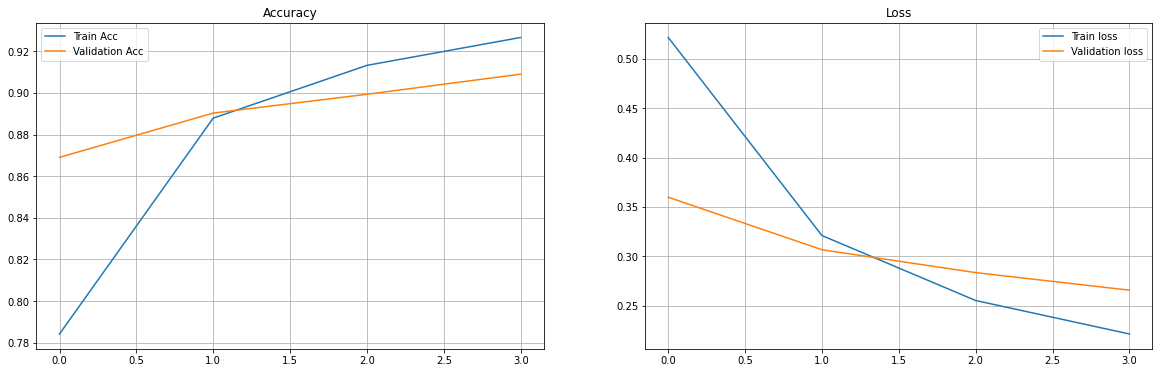

In [55]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()
    
plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()

plt.show()

###Test

In [56]:
def predict_text(text):
  word_seq = np.array([vocab[preprocess_string(word)] for word in text.split() 
                    if preprocess_string(word) in vocab.keys()])
  word_seq = np.expand_dims(word_seq, axis=0)
  pad =  torch.from_numpy(padding_(word_seq, 500))
  inputs = pad.to(device)
  batch_size = 1
  output, h = model(inputs)
  return output

df_test = pd.read_csv(path_test)

labels = ('negative', 'neutral', 'positive')

df_test['sentiment'] = [labels[i] for i in df_test['sentiment']]

# ===============================================
model = SentimentRNN(no_layers, vocab_size, hidden_dim, embedding_dim, output_dim, drop_prob=0.5).to(device)
model.load_state_dict(torch.load('./state_dict.pt'))
model.eval()
with torch.no_grad():
  pred = [labels[predict_text(it).argmax(1)] for it in df_test['sentence']]
  df_test.insert(2, 'pred', pred)

print('Test accuracy:', np.sum(df_test['sentiment'] == df_test['pred'])/len(df_test['sentiment']))

df_test.head()

Test accuracy: 0.8900821225521163


,sentence,sentiment,pred
0,nói tiếng anh lưu loát .,positive,negative
1,giáo viên rất vui tính .,positive,positive
2,cô max có tâm .,positive,positive
3,"giảng bài thu hút , dí dỏm .",positive,positive
4,"giáo viên không giảng dạy kiến thức , hướng dẫ...",negative,negative
